# Quickstart

This quickstart guide will show you how to get started with the `holisticai` library.

Install holisticai using pip:

In [1]:
#!pip install -q holisticai

In [2]:
# skip warnings
import warnings
warnings.filterwarnings("ignore")

Load an example dataset and split

In [4]:
from holisticai.datasets import load_dataset

dataset = load_dataset('law_school')
dataset_split = dataset.train_test_split(test_size=0.3)

# some stats about the data
dataset['x'].describe()

,age,decile1,decile3,fam_inc,lsat,ugpa
count,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000,20800.000000
mean,59.112115,5.746779,5.565096,3.465625,36.762808,3.226500
std,5.271906,2.780279,2.857598,0.853842,5.386819,0.412616
min,3.000000,1.000000,1.000000,1.000000,11.000000,0.000000
25%,58.000000,3.000000,3.000000,3.000000,33.000000,3.000000
50%,61.000000,6.000000,6.000000,4.000000,37.000000,3.300000
75%,62.000000,8.000000,8.000000,4.000000,41.000000,3.500000
max,69.000000,10.000000,10.000000,5.000000,48.000000,4.000000


In [5]:
dataset['y'].value_counts()

bar
1    18507
0     2293
Name: count, dtype: int64

Dataset clustering and correlation analysis

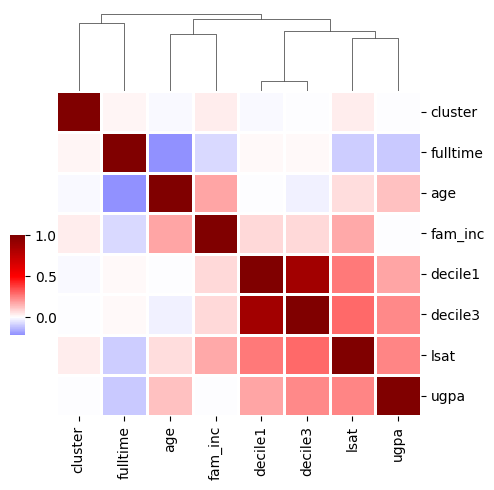

In [6]:
import seaborn as sns
g = sns.clustermap(dataset['x'].corr(), center=0, cmap="seismic", dendrogram_ratio=(.1, .2), cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(5, 5))

g.ax_row_dendrogram.remove()

Separate the data into train and test sets

In [7]:
train_data = dataset_split['train']
test_data = dataset_split['test']

print(train_data['x'].shape)
print(test_data['x'].shape)

(14560, 8)
(6240, 8)


Rescale the training and testing data

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_t = scaler.fit_transform(train_data['x'])
X_test_t = scaler.transform(test_data['x'])

Training a logistic regression model and compute predictions

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train_t, train_data['y'])

# make predictions
y_pred = model.predict(X_test_t)

A simple classification report for model's predictions

In [10]:
from sklearn.metrics import classification_report

print(classification_report(test_data['y'], y_pred))

              precision    recall  f1-score   support

           0       0.60      0.22      0.33       707
           1       0.91      0.98      0.94      5533

    accuracy                           0.90      6240
   macro avg       0.75      0.60      0.64      6240
weighted avg       0.87      0.90      0.87      6240



Classification bias metrics for the model's predictions

In [11]:
from holisticai.metrics.bias import classification_bias_metrics

metrics = classification_bias_metrics(
group_a = test_data['group_a'],
group_b = test_data['group_b'],
y_true = test_data['y'],
y_pred = y_pred
)

metrics

,Value,Reference
Metric,,
Statistical Parity,0.172941,0
Disparate Impact,1.213069,1
Four Fifths Rule,0.824356,1
Cohen D,0.902750,0
2SD Rule,24.618566,0
Equality of Opportunity Difference,0.085044,0
False Positive Rate Difference,0.313732,0
Average Odds Difference,0.199388,0
Accuracy Difference,0.164560,0


Plot the bias metrics in a simple plot 

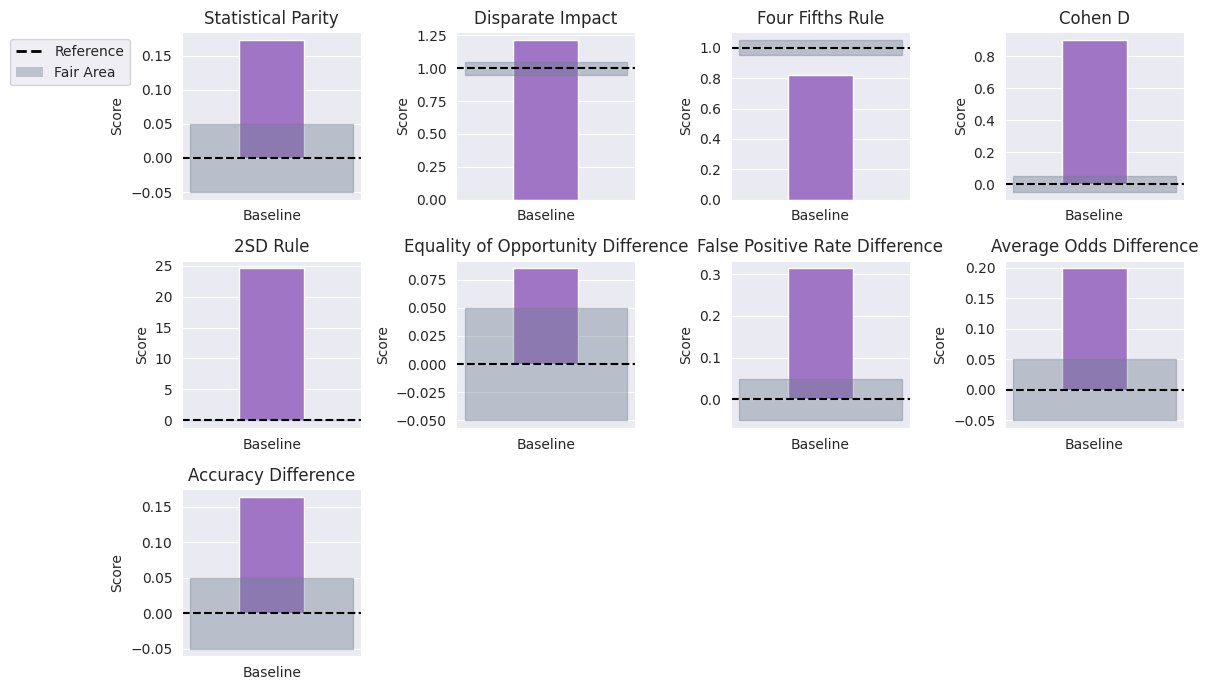

In [12]:
from holisticai.plots.bias import bias_metrics_report

bias_metrics_report(model_type='binary_classification', table_metrics=metrics)